**Initializing:**

In [6]:
#mounting data on colab with python
from google.colab import drive
drive.mount('/content/drive')
#initializing R on colab
%load_ext rpy2.ipython

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


**Libraries:**

In [7]:
%%R
#installing and loading libraries
install.packages("sparklyr")
install.packages("data.table")
install.packages("ggthemes") 
install.packages("cowplot")
install.packages("gridExtra")
install.packages("corrr")

library(ggthemes) 
library(dplyr)
library(purrr)
library(ggplot2)
library(readr)
library(sparklyr)
library(data.table)
library(cowplot)
library(gridExtra)
library(corrr)
library(repr)

spark_install("3.2.1")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/sparklyr_1.7.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 4789739 bytes (4.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

**Loading Data:**

In [8]:
%%R

#reading data with RSpark from google drive
NAME="data_spark"
DATA_PATH="/content/drive/MyDrive/data/claims2.csv"

sc =spark_connect(master = "local")
data_spark=spark_read_csv(sc, path=DATA_PATH, 
                             name=NAME,overwrite = T)


R[write to console]: Re-using existing Spark connection to local



**Cleaning** **Data:**

In [9]:
%%R
gc()
DATA_PATH="/content/drive/MyDrive/data/claims2.csv"

#Loading data with Fread
data_fread = invisible(fread(DATA_PATH))

#cleaing procedure:
#(1) Remove ROW_ID from features space
#(2) Replace "?" by NA in the variables concerned
#(3) Replace implausible value by NA
data_fread=data_fread%>% 
                select(-c("Row_ID"))%>% #(1)
                mutate(across(c(Cat1, Cat2, Cat3, Cat4, Cat5, Cat6, Cat7, Cat8, Cat9, Cat10, Cat11, Cat12, OrdCat, Blind_Make), na_if, "?"))%>% #(2)
                mutate(veh_age = replace(veh_age, which(veh_age<0), NA)) #(3)          

R[write to console]: |--------------------------------------------------|
|
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

**Plot 1:**

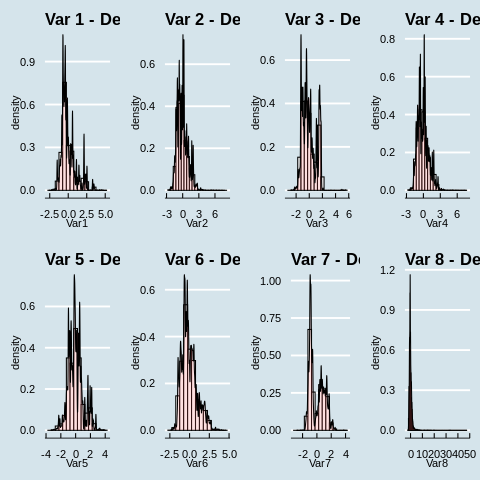

In [10]:
%%R

#density subplot for non-categorical variables with ggplot2 (geom_histogram()) and ggthemes libraries for the layout

#Var1 plot
plot_1 <- ggplot(data_fread, aes(x=Var1)) + 
  geom_histogram(aes(y=..density..),      
                binwidth=.5,
                colour="black",fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Var 1 - Density")

#Var2 plot
plot_2 <- ggplot(data_fread, aes(x=Var2)) + 
  geom_histogram(aes(y=..density..),      
                binwidth=.5,
                colour="black",fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Var 2 - Density")

#Var3 plot
plot_3 <- ggplot(data_fread, aes(x=Var3)) + 
  geom_histogram(aes(y=..density..),      
                binwidth=.5,
                colour="black",fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Var 3 - Density")

#Var4 plot
plot_4 <- ggplot(data_fread, aes(x=Var4)) + 
  geom_histogram(aes(y=..density..),      
                binwidth=.5,
                colour="black",fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Var 4 - Density")

#Var5 plot
plot_5 <- ggplot(data_fread, aes(x=Var5)) + 
  geom_histogram(aes(y=..density..),      
                binwidth=.5,
                colour="black",fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Var 5 - Density")

#Var6 plot
plot_6 <- ggplot(data_fread, aes(x=Var6)) + 
  geom_histogram(aes(y=..density..),      
                binwidth=.5,
                colour="black",fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Var 6 - Density")

#Var7 plot
plot_7 <- ggplot(data_fread, aes(x=Var7)) + 
  geom_histogram(aes(y=..density..),      
                binwidth=.5,
                colour="black",fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Var 7 - Density")

#Var8 plot
plot_8 <- ggplot(data_fread, aes(x=Var8)) + 
  geom_histogram(aes(y=..density..),      
                binwidth=.5,
                colour="black",fill="white") +
  geom_density(alpha=.2, fill="#FF6666") +
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Var 8 - Density")

#arranging subplot as a 4x2 matrix
grid.arrange(plot_1, plot_2, plot_3, plot_4, plot_5, plot_6, plot_7, plot_8, ncol=4)
q <- plot_grid(plot_1, plot_2, plot_3, plot_4, plot_5, plot_6, plot_7, plot_8, align = "v", ncol = 4, rel_heights = c(1/4, 1/4, 1/2))

#saving subplot with defined size as png-file
ggsave(plot=q,width=16,height=8,dpi=400,filename="density_graphs.png")

**Plot 2:**

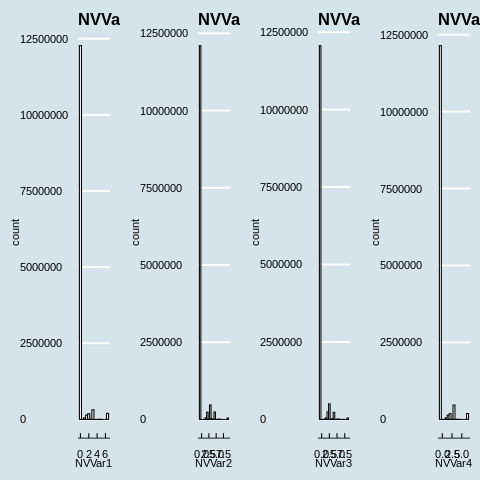

In [11]:
%%R
#distribution subplot for non-categorical variables with ggplot2 (geom_histogram()) and ggthemes libraries for the layout

#NVVar1 plot
plot_1 <- ggplot(data_fread, aes(x=NVVar1)) +
    geom_histogram(binwidth=.5, colour="black", fill="white") +
    theme_economist() + 
  scale_color_economist()+
  ggtitle("NVVar 1 - Distribution") 

#NVVar2 plot
plot_2 <- ggplot(data_fread, aes(x=NVVar2)) +
    geom_histogram(binwidth=.5, colour="black", fill="white") +
    theme_economist() + 
  scale_color_economist()+
  ggtitle("NVVar 2 - Distribution") 

#NVVar3 plot
plot_3 <- ggplot(data_fread, aes(x=NVVar3)) +
    geom_histogram(binwidth=.5, colour="black", fill="white") +
    theme_economist() + 
  scale_color_economist()+
  ggtitle("NVVar 3 - Distribution")

#NVVar4 plot
plot_4 <- ggplot(data_fread, aes(x=NVVar4)) +
    geom_histogram(binwidth=.5, colour="black", fill="white") +
    theme_economist() + 
  scale_color_economist()+
  ggtitle("NVVar 4 - Distribution")  

#arranging subplot as a 4x1 matrix
grid.arrange(plot_1, plot_2, plot_3, plot_4, ncol=4)
q_2 <- plot_grid(plot_1, plot_2, plot_3, plot_4, align = "v", ncol = 4, rel_heights = c(1/4, 1/4, 1/2))

#saving subplot with defined size as png-file
ggsave(plot=q_2,width=16,height=4,dpi=400,filename="nvar_distribution_graphs.png")
 

**Plot 3:**

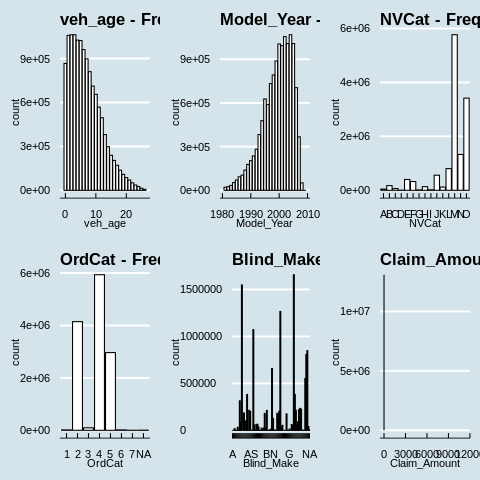

In [12]:
%%R
#distribution subplot for categorical varibles with ggplot2 (geom_bar()) and ggthemes libraries for the layout

#veh_age plot
plot_1 <- ggplot(data_fread, aes(x=veh_age)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("veh_age - Frequency")

#Model_Year plot
plot_2 <- ggplot(data_fread, aes(x=Model_Year)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Model_Year - Frequency")

#NVCat plot
plot_3 <- ggplot(data_fread, aes(x=NVCat)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("NVCat - Frequency")

#OrdCat plot
plot_4 <- ggplot(data_fread, aes(x=OrdCat)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("OrdCat - Frequency") 

#Blind_Make plot
plot_5 <- ggplot(data_fread, aes(x=Blind_Make)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Blind_Make - Frequency") +
  scale_x_discrete(guide = guide_axis(check.overlap = TRUE))#overlapping values are deleted to make plot better readable

#MClaim_Amount plot
plot_6 <- ggplot(data_fread, aes(x=Claim_Amount)) +
    geom_bar(binwidth=.5, colour="black", fill="white") +
    theme_economist() + 
  scale_color_economist()+
  ggtitle("Claim_Amount - Distribution") 

#arranging subplot as a 3x2 matrix
grid.arrange(plot_1, plot_2, plot_3, plot_4, plot_5, plot_6, ncol=3)
q_4 <- plot_grid(plot_1, plot_2, plot_3, plot_4, plot_5, plot_6, align = "v", ncol = 3, rel_heights = c(1/4, 1/4, 1/2))

#saving subplot with defined size as png-file
ggsave(plot=q_4,width=14,height=6,dpi=400,filename="general_variable_distributions.png")

**Plot 4:**

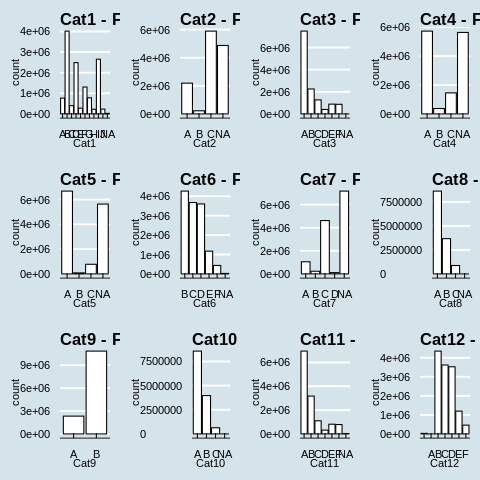

In [13]:
%%R
#distribution subplot for categorical varibles with ggplot2 (geom_bar()) and ggthemes libraries for the layout

#Cat1 plot
plot_1 <- ggplot(data_fread, aes(x=Cat1)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat1 - Frequency")

#Cat2 plot
plot_2 <- ggplot(data_fread, aes(x=Cat2)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat2 - Frequency")

#Cat3 plot
plot_3 <- ggplot(data_fread, aes(x=Cat3)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat3 - Frequency")

#Cat4 plot
plot_4 <- ggplot(data_fread, aes(x=Cat4)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat4 - Frequency")

#Cat5 plot
plot_5 <- ggplot(data_fread, aes(x=Cat5)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat5 - Frequency")

#Cat6 plot
plot_6 <- ggplot(data_fread, aes(x=Cat6)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat6 - Frequency")

#Cat7 plot
plot_7 <- ggplot(data_fread, aes(x=Cat7)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat7 - Frequency")

#Cat8 plot
plot_8 <- ggplot(data_fread, aes(x=Cat8)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat8 - Frequency")

#Cat9 plot
plot_9 <- ggplot(data_fread, aes(x=Cat9)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat9 - Frequency")

#Cat10 plot
plot_10 <- ggplot(data_fread, aes(x=Cat10)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat10 - Frequency")

#Cat11 plot
plot_11 <- ggplot(data_fread, aes(x=Cat11)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat11 - Frequency")

#Cat12 plot
plot_12 <- ggplot(data_fread, aes(x=Cat12)) +
  geom_bar(binwidth=0.5, colour="black", fill="white") + 
  theme_economist() + 
  scale_color_economist()+
  ggtitle("Cat12 - Frequency")

#arranging subplot as a 4x3 matrix
grid.arrange(plot_1, plot_2, plot_3, plot_4, plot_5, plot_6,plot_7,plot_8,plot_9,plot_10,plot_11,plot_12, ncol=4)
q_5 <- plot_grid(plot_1, plot_2, plot_3, plot_4, plot_5, plot_6,plot_7,plot_8,plot_9,plot_10,plot_11,plot_12, align = "v", ncol = 4, rel_heights = c(1/3, 1/3, 1/3))

#saving subplot with defined size as png-file
ggsave(plot=q_5,width=14,height=6,dpi=400,filename="cat_variable_distributions.png")

**Unused Plot:** 
As mentionned in the presentation usual heatmap codes will crash the session as they will use too much RAM. This code is an example for that and therefore set into comments. Running this code will results in session crash.

In [ ]:
'''
%%R
install.packages("ggcorrplot")
library(ggcorrplot)

#only selecting numeric varibales
data_fread_numeric <- dplyr::select_if(data_fread, is.numeric)

#computing correlations and plotting heat map 
ggcorrplot(cor(data_fread_numeric, use = "complete.obs"), 
           hc.order = TRUE, type = "upper",lab = TRUE)
'''

'\n%%R\ninstall.packages("ggcorrplot")\nlibrary(ggcorrplot)\n\ndata_fread_numeric <- dplyr::select_if(data_fread, is.numeric)\n#heatmap: plot size needs to be adjusted\nggcorrplot(cor(data_fread_numeric, use = "complete.obs"), \n           hc.order = TRUE, type = "upper",lab = TRUE)\n'

**Plot 5:**
This is the more efficient code for a heatmap.

In [14]:
%%R
#only selecting numeric varibales
data_spark_numeric <- dplyr::select_if(data_spark, is.numeric)

#running correlation with numeric variables
corr_data_spark <- data_spark_numeric %>% correlate()

#initializing heat map with correlations
heat_map <- corr_data_spark %>% 
  rplot() +
  scale_x_discrete(guide = guide_axis(check.overlap = TRUE))#deleting overlapping values, x-axis becomes shorter making it easier for PPT Slide

#saving plot as png file
ggsave(plot=heat_map, filename="heat-map.png")

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`


R[write to console]: 
Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'


R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Don't know how to automatically pick scale for object of type noquote. Defaulting to continuous.



**Plot 6:** 

In [15]:
%%R

#plotting Claim_Amount distribution
claim_plot <- ggplot(data_fread, aes(x=Claim_Amount)) +
    geom_histogram(nbar=10, colour="black", fill="white") +
    theme_economist() + 
  scale_color_economist()+
  ggtitle("Claim_Amount - Distribution") 

#saving plot as png file
ggsave(plot=claim_plot, filename="claim_distribution_plot_non_transformed.png")


R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



**Log (x+1) Transformation and Plot 7:**

In [16]:
%%R

 #log(x+1) transformation of Claim_Amount
data_fread <- mutate(data_fread, log_Claim_Amount=log(Claim_Amount+1))

#setting 0 values of Claim_Amount to NA's
data_fread <- data_fread %>% mutate(log_Claim_Amount = replace(log_Claim_Amount, which(log_Claim_Amount == 0), NA))

#plotting distribution of non zero log transformed Claim_Amount
p_6 <- ggplot(data_fread, aes(x=log_Claim_Amount)) +
    geom_histogram(colour="black", fill="white") +
    theme_economist() + 
  scale_color_economist()+
  ggtitle("Non-Zero-Log Claim_Amount - Distribution")

#saving plot as png-file
ggsave(plot=p_6, filename="non_zero_claim_log_distribution.png")



R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

